<a href="https://colab.research.google.com/github/SujitbMusale/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.


    Content

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

# Data Importing and Data Claeaning

In [ ]:
#Importing Libararies
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the user file
Users=pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Unsupervised Machine Learning/Users.csv')

In [ ]:
# loading the Books File
Books=pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Unsupervised Machine Learning/Books.csv')

In [ ]:
# loading the Rating file
Ratings=pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Unsupervised Machine Learning/Ratings.csv')

In [ ]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#lets check the dimension of sheet
Users.shape

(278858, 3)

In [ ]:
Books.shape

(271360, 8)

In [ ]:
Ratings.shape

(1149780, 3)

# Data Cleaning- User Dataset.

In [ ]:
# lets take user data
# chcek th missing value
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

So, from above we can say that the age is having large number of value as a missing value.

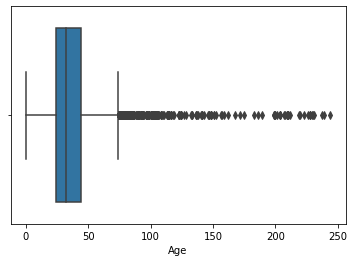

In [ ]:
# lets check the outliers from the age colum
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()   
sns.boxplot(x=Users['Age'])

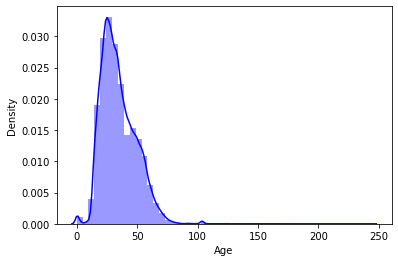

In [ ]:
# lets chcek the distribution of'Age'.
sns.distplot(Users['Age'],kde=True,color='blue')

The data is showing some points are above the 100 so either we can remove data beyound upper quartile and we can obser ther are age numbers are from 100 to 250 whic seems to be ouliers from distribution graph.
and also upto 5 year people will not read a book.

In [ ]:
#replacing the outliers in 'Age' with NaN value
Users.loc[(Users['Age']>85)|(Users['Age']<5),'Age']=np.nan


In [ ]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',Users['Age'].isnull().sum())

The number of missing values is  112096


In [ ]:
Users['Age'].describe()

count    166762.000000
mean         34.716860
std          13.573044
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          85.000000
Name: Age, dtype: float64

as from disctibution plot we can see that data is positively skweed we can fill data data by mean of data.

In [ ]:
# create a normal distribution pd.Series to fill Nan values with
normal_age_series = pd.Series(np.random.normal(loc=Users.Age.mean(), scale=Users.Age.std(), size=Users[Users.Age.isna()]['User-ID'].count()))

# take the absolute value of temp_age_series
abs_age_series=np.abs(normal_age_series)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
Users = Users.sort_values('Age',na_position='first').reset_index(drop=True)
Users.Age.fillna(round(abs_age_series), inplace = True)

In [ ]:
Users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

As from abow there is no null value resent in Users data set.

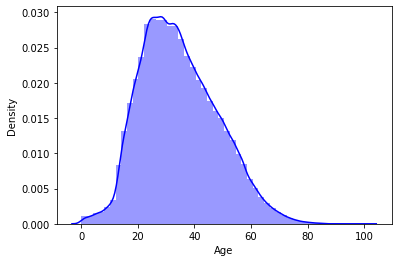

In [ ]:
# lets chcek the distribution of'Age'.
sns.distplot(Users['Age'],kde=True,color='blue')

In [ ]:
# lets check the duplicate value in Users data sat.
Users[Users['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

There is no any duplicate value in user dataset.

In [ ]:
# lets create the age group to have a better study.
def Age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [ ]:
# Use lambda function
Age_group = Users['Age'].apply(lambda x: Age_group(x))

In [ ]:
# now lets work on location columns
# lets chcek the number of unique value
print(Users['Location'].nunique())
Users.Location.unique()


57339


array(['nyc, new york, usa', 'moscow, yukon territory, russia',
       'farnborough, hants, united kingdom', ..., 'x, x, x',
       'aurora, new york, australia',
       'waalre, noord brabant, netherlands'], dtype=object)

In [ ]:
#extracting the country names.
for i in Users:
    Users['Country']=Users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')


In [ ]:
Users.Country.nunique()

529

In [ ]:
# convert the data into string type.
Users['Country']=Users['Country'].astype('str')

Now we can see that the country name are 529 which are considerable.

In [ ]:
#drop location column
Users.drop('Location',axis=1,inplace=True)

In [ ]:
# lets check the unique data
a=list(Users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

lets correct the miss- spelled and numeric data from unique country name.

In [ ]:
#correcting the mispelled country names
Users.loc[Users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
Users.loc[Users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america',
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
Users.loc[Users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
Users.loc[Users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
Users.loc[Users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
Users.loc[Users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
Users.loc[Users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
Users['Country'].replace(['the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'])

0                 usa
1              russia
2                  uk
3                 usa
4              canada
             ...     
278853            usa
278854    netherlands
278855      australia
278856            usa
278857            usa
Name: Country, Length: 278858, dtype: object

In [ ]:
Users['Country'].nunique()

483

Here the total after rmoving miss-spelled and numeric data now we got 483 country name only.

In [ ]:
#Converting the country names to uppercase
Users['Country']=Users['Country'].str.upper()

# Data Cleaning- Books Dataset.

In [ ]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Check the shape
Books.shape

(271360, 8)

In [ ]:
# check the null values
Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

From above we can see that the total row are 271360 which is too large and we are having null value in Publisher and Image-URL-L   2 and 3 respectively.
inshort its too low so we can easily drop that column.

In [ ]:
# drop the nan rows
Books=Books.dropna()

In [ ]:
#insepcting the values in year of publication
Books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see that some of data is in str and some in numeric form so we will convert all data in to numeric form.

In [ ]:
Books['Year-Of-Publication']=pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')

The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

here we can see that date is left skewed and some of the book published in year 1400 it is possible that the book are that time nut some ofthe book published after 2006 and some of having publihed year 0 whic we can say as a outlier so ,We will replace the value with median

In [ ]:
Books.loc[(Books['Year-Of-Publication'] > 2006)|(Books['Year-Of-Publication'] == 0)|(Books['Year-Of-Publication'] < 1700), 'Year-Of-Publication'] = np.NAN
#replacing NaNs with median value of Year-Of-Publication
Books['Year-Of-Publication'].fillna(round(Books['Year-Of-Publication'].median()), inplace=True)

Also we will drop the last three URL columns as its dont have any important in analysis

In [ ]:
Books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
Books['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

'ISBN' is also ok column no need to work on it.

In [ ]:
#Uppercasing the ISBN numbers and Book-Author name
Books['ISBN']=Books['ISBN'].str.upper()
Books['Book-Author']=Books['Book-Author'].str.upper()

In [ ]:
#Checking for duplicates in books dataset
Books[Books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
6635,002542730X,Politically Correct Bedtime Stories: Modern Ta...,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group
...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA)
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books
269552,037376099X,Patient Nurse (Man Of The Month) (Harlequin D...,DIANA PALMER,1997.0,Silhouette
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH)


ISBN numbers for books with the same title and author would change if the year of release (revised editions),regional versions or publishing companies are different. So, let's look for rows where entire column values are identical.

In [ ]:
#Dropping the rows with the entire column values are duplicated
Books.drop_duplicates(keep="first",inplace=True)
Books.reset_index(drop=True,inplace=True)

In [ ]:
# lets check head data for books
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,MARK P. O. MORFORD,2002.0,Oxford University Press
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,CARLO D'ESTE,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,GINA BARI KOLATA,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. BARBER,1999.0,W. W. Norton &amp; Company


Now data seems ok for eda.

# Data Cleaning- Rating Dataset.


In [ ]:
# checking null values
Ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

So we dont have null and Nan value in the data set




In [ ]:
# making all the ISBN no. uppercase
Ratings['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [ ]:
# checking for duplicates
Ratings[Ratings.duplicated()].sum()


User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

As we know that the Ratings data set should not contain books out of books data set so, we will take only that data which is required for analysis.

In [ ]:
Books_Rating = Ratings[Ratings.ISBN.isin(Books.ISBN)]

In [ ]:
Ratings.shape,Books_Rating.shape

((1149780, 3), (1030610, 3))

In [ ]:
list(Ratings.shape)[0] -list(Books_Rating.shape)[0]

119170

From above we can see there are may Rating are not of our intrest.

Also Ratibg data set should have rating from users which exsit in users data set.

In [ ]:
Books_Rating = Books_Rating[Books_Rating['User-ID'].isin(Users['User-ID'])]

In [ ]:
# lets check the shape of data
Books_Rating.shape

(1030610, 3)

In [ ]:
Books_Rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


No change in Books_Rating so, we can say that no new user in rating dataset 

# EDA

Text(0.5, 1.0, 'Users count vs country name')

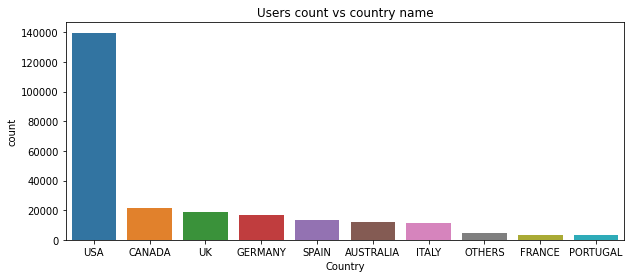

In [ ]:
fig = plt.figure(figsize=(10, 4))
sns.countplot(x='Country',data=Users,order=pd.value_counts(Users['Country'],ascending=False).iloc[:10].index)
plt.title('Users count vs country name')

We can see that the most of users are from USA.
and other country are ahveing very low number of customers as compared to USA.
canada , UK, Germany, spain.australia and itely are having some presence rather than other country.

Here from above plot we see that most of the people are in the range of 20 to 40 are the users are use to read book. and also we can see that some outlier are till present in data set but as we know that people between age group 80 to 100 use to read book or can read a book so we will keep this data

In [ ]:
Users.head()

,User-ID,Age,Country
0,1,34.0,USA
1,3,31.0,RUSSIA
2,5,27.0,UK
3,7,45.0,USA
4,8,20.0,CANADA


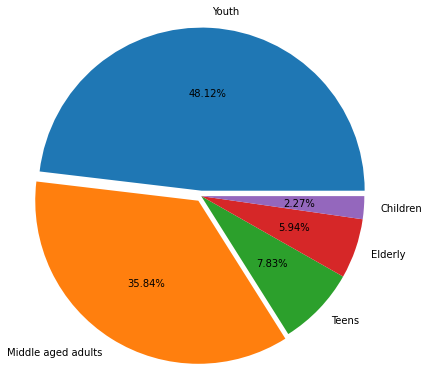

In [ ]:
# lets check users according to age group.
plt.figure(figsize=(20,5))
plt.pie(Age_group.value_counts(),labels=Age_group.unique(),radius=1.5,autopct='%0.2f%%',explode=[0.05,0.05,0,0,0])
plt.show()

Here we can say that the Youth are more in numbers as compaired to others, 
Children ahve very low counts.

Text(0.5, 1.0, 'Top 10 Authors')

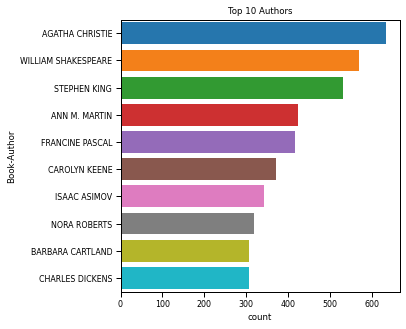

In [ ]:
# lets check the TOP Authers who has written most number of books
sns.set_context("paper", font_scale=0.9) 
plt.figure(figsize=(5,5))
sns.countplot(y='Book-Author',data=Books,order=pd.value_counts(Books['Book-Author']).iloc[:10].index,saturation=0.9)
plt.title('Top 10 Authors')

In [ ]:
# book ratings
Books_Rating['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,646971
1,8,91738
2,10,71194
3,7,66355
4,9,60752
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374


We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10. There are 646974 implicitely rated books.

Text(0.5, 1.0, 'Top 10 Authors')

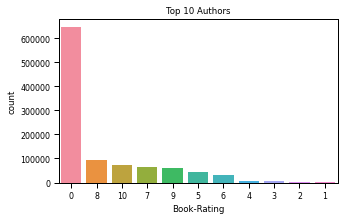

In [ ]:
# lets check the rating distribution 
sns.set_context( font_scale=0.9) 
plt.figure(figsize=(5,3))
sns.countplot(x='Book-Rating',data=Books_Rating,order=pd.value_counts(Books_Rating['Book-Rating']).index,saturation=0.9)
plt.title('Top 10 Authors')

Here the count of zero is high so we can say that most of the people dont use to give rating also most of the people has given a rating of 8 thats nice we can observe that people use to give rating in between 6 to 10.

In [ ]:

Explicit_rating = Books_Rating[Books_Rating['Book-Rating'] != 0]
Implicit_rating = Books_Rating[Books_Rating['Book-Rating'] == 0]
print(Explicit_rating.shape, Implicit_rating.shape)

(383639, 3) (646971, 3)


# Merging All data set

In [ ]:
df = pd.merge(Books, Explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, Users, on='User-ID', how='inner')



In [ ]:
df.shape

(383689, 9)

In [ ]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,8,5,20.0,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,8,5,20.0,CANADA
2,0887841740,The Middle Stories,SHEILA HETI,2004.0,House of Anansi Press,8,5,20.0,CANADA
3,1552041778,Jane Doe,R. J. KAISER,1999.0,Mira Books,8,5,20.0,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),LOREN D. ESTLEMAN,1998.0,Brilliance Audio - Trade,8,6,20.0,CANADA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383689 entries, 0 to 383688
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383689 non-null  object 
 1   Book-Title           383689 non-null  object 
 2   Book-Author          383689 non-null  object 
 3   Year-Of-Publication  383689 non-null  float64
 4   Publisher            383689 non-null  object 
 5   User-ID              383689 non-null  int64  
 6   Book-Rating          383689 non-null  int64  
 7   Age                  383689 non-null  float64
 8   Country              383689 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 29.3+ MB


# EDA On Marged Data set

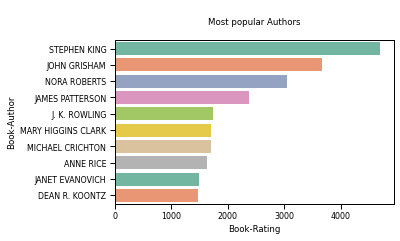

In [ ]:
# most popular book authors
sns.set_context( font_scale=0.9) 
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[5,3])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

Top book author with respect to the number of ratings is Stephen King. 

In [ ]:
#How many users have rated atleast 1 book?
df['User-ID'].value_counts()

11676     6940
98391     5690
189835    1899
153662    1846
23902     1180
          ... 
37259        1
53095        1
51124        1
235548       1
259679       1
Name: User-ID, Length: 68080, dtype: int64

There are 68080 users who have rated atleast one book

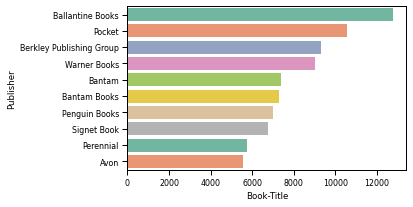

In [ ]:
# Publisher with most books
publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[5,3])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

Ballantine Books is most popular publisher based on the number of users who have rated their books

#Collaborative Filtering -(Model Based)

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import math

In [ ]:
#Filtering books with more than 5 reviews
ratings_count_df=Explicit_rating.groupby("ISBN")['User-ID'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'ISBN'].unique())
filter_df=Explicit_rating.loc[Explicit_rating['ISBN'].isin(selected_books)]
print('The number of books that are explicitely rated are',Explicit_rating['ISBN'].nunique())
print('Number of  books rated by atleast 5 users:',len(selected_books))


The number of books that are explicitely rated are 149651
Number of  books rated by atleast 5 users: 10731


In [ ]:
#keeping books with selected users
#keeps Users who have rated more than five books
books_count_df=filter_df.groupby("User-ID")['ISBN'].count().to_frame('No-of-books-rated').reset_index()
selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'User-ID'].unique())
print('The number of users who have explicitely rated books are',Explicit_rating['User-ID'].nunique())
print('Number of  users who have rated atleast 5 books are :',len(selected_users))


The number of users who have explicitely rated books are 68080
Number of  users who have rated atleast 5 books are : 5911


In [ ]:
#dataframe with filtered number of interactions
filter_df=filter_df.loc[filter_df['User-ID'].isin(selected_users)]
print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

The shape of data fame with filtered number of interactions :  (114147, 3)


In [ ]:
complete_df = filter_df.copy()

In [ ]:
complete_df['Book-Rating'].describe()

count    114147.000000
mean          7.816728
std           1.774365
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [ ]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
#applying function
complete_df['Book-Rating']= complete_df['Book-Rating'].apply(smooth_user_preference)
complete_df.head()

,User-ID,ISBN,Book-Rating
177,276847,3404148576,3.169925
179,276847,3423071516,3.459432
186,276847,3442413508,3.459432
189,276847,3442437717,3.000000
190,276847,3442441080,3.459432


In [ ]:
# split data in to train and test set
train_df, test_df = train_test_split(complete_df,
                                   stratify=complete_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 91317
# interactions on Test set: 22830


In [ ]:
test_df.head()

,User-ID,ISBN,Book-Rating
595435,143415,0804117683,2.584963
1129708,271195,0061091502,3.169925
921324,224430,0446675059,3.321928
963425,232492,0553580191,3.459432
415865,98783,0553290797,3.169925


In [ ]:
#Creating a sparse pivot table with users in rows and ISBN number of books in columns
users_books_pivot_matrix_df = train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_books_pivot_matrix_df.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,881787017X,8838910170,8845205118,8845247414,8845915611,9074336329,950491036X,9681500555,968150108X,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Creating a matrix with the values of users_books_pivot_matrix_df
original_ratings_matrix = users_books_pivot_matrix_df.values
original_ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Storing the User-IDs in a list
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[114, 243, 244, 254, 388, 446, 503, 505, 507, 638]

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(original_ratings_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
#converting sigma to a diagonal matrix
sigma = np.diag(sigma)

After the factorization, we try to  reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It has generated rating predictions for books with which users have not yet interacted (and therefore not rated), which we will use to recommend relevant books to the user

In [ ]:
#Rating matric reconstructed using the matrices obtained after factorizing
predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings_matrix

array([[-4.04258460e-03,  5.55244996e-03,  3.55055121e-04, ...,
         1.50895745e-03,  2.40835026e-03, -4.47942990e-04],
       [ 2.39738748e-03,  7.31390062e-03,  1.06721793e-03, ...,
         2.41422467e-03, -2.50155111e-03,  7.07560167e-04],
       [ 2.76172022e-03,  2.46976045e-03,  3.93502515e-04, ...,
         7.51697062e-05, -3.15196343e-04,  4.15219598e-04],
       ...,
       [-3.77213135e-03,  4.35044249e-03,  7.91362149e-04, ...,
        -1.50838380e-03,  3.13716934e-04,  7.99373179e-05],
       [-9.99820694e-04, -5.55826794e-03, -1.68973261e-04, ...,
        -2.70869693e-04, -2.11730260e-03,  7.02884677e-03],
       [ 3.24745355e-03,  2.10480356e-03, -1.81779252e-04, ...,
        -3.05056878e-03, -1.71475791e-04,  2.70358799e-04]])

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()

,114,243,244,254,388,446,503,505,507,638,...,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,-0.004043,0.002397,0.002762,-0.003667,-0.000216,-0.000260,0.002452,-0.000518,0.004893,0.013587,...,0.000900,0.000915,-0.000973,0.001754,0.001617,0.002436,0.000213,-0.003772,-0.001000,0.003247
0002251760,0.005552,0.007314,0.002470,0.021147,0.000592,0.000613,0.002472,0.004229,0.003706,0.015128,...,-0.000332,0.000689,-0.001395,0.004843,-0.004528,-0.000479,0.000768,0.004350,-0.005558,0.002105
0002259834,0.000355,0.001067,0.000394,0.002019,0.000052,0.000053,0.000451,-0.000140,0.000439,0.000354,...,0.000172,0.000070,-0.000247,0.000445,-0.000263,0.000017,0.000091,0.000791,-0.000169,-0.000182
0002558122,-0.003808,-0.003172,0.001659,-0.004843,-0.000196,-0.000568,0.001098,-0.000394,0.002326,0.013740,...,-0.000164,0.000997,0.001802,0.001870,0.001901,0.003525,0.000112,-0.004649,-0.001760,0.003177
0006480764,-0.000063,0.002744,0.000518,0.000504,-0.000052,0.000107,0.000705,-0.000046,0.000544,0.008970,...,0.000426,0.000068,-0.001599,-0.000073,0.000081,-0.000446,0.000147,0.000411,0.009194,-0.000599


Model Recomndation

In [ ]:
# Bulding the recomder model
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Books_Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Books_Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Book-Title',	'Book-Author','Publisher']]

        return recommendations_df

#Creating object of the class   
cf_recommender_model = CFRecommender(predicted_ratings_df, Books)

In [ ]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    #Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
#Indexing by personId to speed up the searches during evaluation
full_indexed_df =complete_df.set_index('User-ID')
train_indexed_df = train_df.set_index('User-ID')
test_indexed_df = test_df.set_index('User-ID')

In [ ]:
#The books that were already rated by this user
print(f'These are  books that the user ID {user_ids[10]} has already rated \n')
Books.loc[Books['ISBN'].isin(list(get_items_interacted(user_ids[10],train_indexed_df)))]['Book-Title']

These are  books that the user ID 643 has already rated 



811      George W. Bushisms : The Slate Book of The Acc...
819                                            Les Fourmis
823      Scottish Folk and Fairy Tales (Penguin Popular...
7289           Pride &amp; Prejudice (Wordsworth Classics)
7856                           FORREST GUMP (Movie Tie in)
15641                                      Vipere Au Poing
15648                                     Bilbo, Le Hobbit
15655         Sacred Clowns (Joe Leaphorn/Jim Chee Novels)
Name: Book-Title, dtype: object

In [ ]:
#Recommendation for a single user
print(f'Recommending books for User ID: {user_ids[10]} ')
cf_recommender_model.recommend_items(user_ids[3],items_to_ignore= get_items_interacted(user_ids[10],train_indexed_df),verbose=True)

Recommending books for User ID: 643 


,ISBN,Book-Title,Book-Author,Publisher
0,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. ROWLING,Scholastic
1,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. ROWLING,Scholastic
2,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. ROWLING,Scholastic
3,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. ROWLING,Scholastic
4,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. ROWLING,Scholastic
5,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. ROWLING,Arthur A. Levine Books
6,0439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. ROWLING,Scholastic Paperbacks
7,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. ROWLING,Scholastic
8,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. ROWLING,Scholastic
9,0446310786,To Kill a Mockingbird,HARPER LEE,Little Brown &amp; Company


Model Evaluation

In [ ]:
# Function for getting the set of books which a user has not interacted with
def get_not_interacted_items_sample(person_id, sample_size, seed=42):
    #Storing interacted items
    interacted_items = get_items_interacted(person_id, full_indexed_df)
    #Getting set of all items
    all_items=set(full_indexed_df["ISBN"])
    #Obtaining non interacted items
    non_interacted_items = all_items - interacted_items

    random.seed(seed)
    #Selecting random sample of given sample_size
    non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
    return set(non_interacted_items_sample)

In [ ]:
#Top-N accuracy metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                #Stores index of item id if it is present in the recommended_items
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                #If item id is not found in the recommended list
                index = -1
            #checking whether index is present in the topN items or not
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = test_indexed_df.loc[person_id]
        
        #Obtaining unique interacted items by the user
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=42)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            #Counting hit at 5
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            #Counting hit at 10
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        
        #Creating a dictionary
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        #Calculating metrics for all users in the test set
        for idx, person_id in enumerate(list(test_indexed_df.index.unique().values)):    
            #Returns dictionary containing person_metrics for each user
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            #Adds user_id to the dictionary
            person_metrics['_person_id'] = person_id
            #Appends each dictionary to the list
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)
        #Creates dataframe containing value of metrics for all the users using the list of dictionaries
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        #Calculating global recall@5 and global recall@10
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        #Creates dictionary containing global metrics
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
5910 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.3053438458169076, 'recall@10': 0.41537450722733243}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
36,65,127,545,0.119,0.233,11676
202,67,78,139,0.482,0.561,98391
271,27,35,93,0.290,0.376,153662
60,16,29,88,0.182,0.330,16795
474,18,29,73,0.247,0.397,95359
485,44,60,72,0.611,0.833,114368
390,29,33,61,0.475,0.541,104636
456,22,26,54,0.407,0.481,158295
660,36,42,54,0.667,0.778,123883
659,8,21,53,0.151,0.396,35859


# Colaborative Filtering -(Memory Based)

KNN Algorithm (Euclidean distance based)

In [ ]:
# we kept running into memory issues, so decided to reduce some data by filtering things out
# focussing on users with more than 3 ratings and top 10% most frequently rated books
required_ratings = 3

user = df['User-ID'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['User-ID'].isin(user_list)]

print('Number of users with ratings more than 3 are: {}'.format(filter_df.shape[0]))

Number of users with ratings more than 3 are: 313413


In [ ]:
# top 10% most frequently rated books
required = len(filter_df.ISBN.unique()) * 0.1

user_list = filter_df['Book-Title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['Book-Title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 167389


In [ ]:
# creating a pivot table
table = filter_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')

In [ ]:
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
one hundred years of solitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# filling null values
table.fillna(0, inplace=True)
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one hundred years of solitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<13402x14951 sparse matrix of type '<class 'numpy.float64'>'
	with 166532 stored elements in Compressed Sparse Row format>

In [ ]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# function to get recommendations

def get_recommendations(name, n):

  # getting book id
  book_id= np.where(table.index==name)[0][0]

  # distances and suggestions based on similarity
  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()

  for i in range(len(suggestions)):
    # if book is same as input
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return

In [ ]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)


The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
Lover Beware
Finders Keepers
J. K. Rowling: The Wizard Behind Harry Potter
So Much to Tell You
Dragonquest Achille Cover


KNN Location Based

In [ ]:
book_rating = df[['User-ID','ISBN','Book-Rating','Book-Title']]

In [ ]:
print(book_rating.shape)

(383689, 4)


In [ ]:
book_rating = book_rating.dropna(axis=0, subset= ['Book-Title'])
book_ratingCount = (book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating' : 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2


In [ ]:
rating_with_totalRatingCount = book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how ='left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,8,0002005018,5,Clara Callan,9
1,8,074322678X,5,Where You'll Find Me: And Other Stories,1
2,8,0887841740,5,The Middle Stories,1
3,8,1552041778,5,Jane Doe,2
4,8,1567407781,6,The Witchfinder (Amos Walker Mystery Series),1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   135507.000
mean         2.832
std          9.134
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        707.000
Name: totalRatingCount, dtype: float64


In [ ]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    5.000
0.920    5.000
0.930    6.000
0.940    7.000
0.950    8.000
0.960   10.000
0.970   13.000
0.980   17.000
0.990   29.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 100
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
8,11676,0399135782,9,The Kitchen God's Wife,115
10,11676,0440234743,9,The Testament,261
14,11676,0971880107,6,Wild Animus,581
15,11676,0345417623,10,Timeline,263
17,11676,0449005615,10,Seabiscuit: An American Legend,133


In [ ]:
#Filtering to users in top 2 countries - US & Canada
combined = rating_popular_book.merge(Users, left_on ='User-ID', right_on= 'User-ID', how='left')

us_canada_user_rating = combined[combined['Country'].str.contains("USA|CANADA")]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis = 1)

us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Country
225,67544,0316569321,7,White Oleander : A Novel,177,CANADA
226,67544,0316601950,8,The Pilot's Wife : A Novel,272,CANADA
229,210926,0440212561,10,Outlander,139,CANADA
230,263325,0446310786,10,To Kill a Mockingbird,267,CANADA
231,263325,0786868716,8,The Five People You Meet in Heaven,244,CANADA


Implimenting KNN

In [ ]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot_table(index = 'Book-Title', columns= 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)


In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i==0:
        print('Recommendations for', format(us_canada_user_rating_pivot.index[query_index]), ':')
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))


Recommendations for The Poisonwood Bible :
1: Pigs in Heaven, with distance of 0.9424704079732581:
2: The God of Small Things, with distance of 0.9489957829259387:
3: ANGELA'S ASHES, with distance of 0.9490199837666955:
4: Girl with a Pearl Earring, with distance of 0.9494940340108347:
5: STONES FROM THE RIVER, with distance of 0.9499490233230932:


# Popularity Based Filtering

we will use below formula to calculate filtering

Weighted average rating method
Using Weighted average for each Book’s Average Rating

W = Rv + Cm/(v + m)

where

W= Weighted Rating

R = Average of the Books rating

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

In [ ]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.000,HarperFlamingo Canada,8,5,20.000,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.000,Scribner,8,5,20.000,CANADA
2,0887841740,The Middle Stories,SHEILA HETI,2004.000,House of Anansi Press,8,5,20.000,CANADA
3,1552041778,Jane Doe,R. J. KAISER,1999.000,Mira Books,8,5,20.000,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),LOREN D. ESTLEMAN,1998.000,Brilliance Audio - Trade,8,6,20.000,CANADA


In [ ]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['Book-Title','Book-Author'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.521549118213556 and the minimum number of votes required by the books to be listed is 4  


In [ ]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [ ]:
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(10)

,Book-Title,Book-Author,avg_rating,ratings_count,weighted_average
46514,Harry Potter and the Chamber of Secrets Postca...,J. K. ROWLING,9.870,23,9.520
122142,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. TOLKIEN,9.654,52,9.500
30141,Dilbert: A Book of Postcards,SCOTT ADAMS,9.923,13,9.360
81782,Postmarked Yesteryear: 30 Rare Holiday Postcards,PAMELA E. APKARIAN-RUSSELL,10.000,11,9.340
118124,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,9.397,78,9.310
17713,Calvin and Hobbes,BILL WATTERSON,9.583,24,9.290
100900,The Authoritative Calvin and Hobbes (Calvin an...,BILL WATTERSON,9.600,20,9.250
72635,"My Sister's Keeper : A Novel (Picoult, Jodi)",JODI PICOULT,9.545,22,9.230
118120,"The Return of the King (The Lord of The Rings,...",J. R. R. TOLKIEN,9.625,16,9.200
120087,The Sneetches and Other Stories,DR. SEUSS,10.000,8,9.170


This is the list of most favored books based on the weighted rating scores. The book 'Harry Potter and the Chamber of Secrets Postcard Book' seems to have top this chart.

#Conclusion

The initial step,of our project was Data preprocessing of the three datasets-books_df,users_df and ratings_df,wherein we removed duplicates and imputed the missing values & invalid entries with appropriate values,corrected spellings.
Then,we performed Exploratory Data Analysis to find out the countries with maximum users,popular books,popular authors and popular publishing companies.We also analysed the rating distribution,age distribution of users and the popular books amongst various age groups .
Then,we used Popularity-based approach,Collaborative filtering approach to built different types of recommendation models.
*We evaluated the performance of Singular Value Decomposition based recommender and obtained a Global Recall@5 of 30 % and Recall@10 of 41%